<a href="https://colab.research.google.com/github/bpizarrogalleguillos/IAmetodologia2025/blob/main/Final_Taller_Supervisado_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos supervisados


## Objetivo
Entregar una comprensión básica de los modelos supervisados en machine learning y cómo se aplican en contextos clínicos, especialmente en radiología, utilizando ejemplos guiados en Google Colab autoejecutable sin necesidad de conocimientos avanzados de programación.

# Aprendizaje esperado

1. Conocer los tipos de problema donde los modelos supervisados pueden ser aplicados
2. Entender el concepto de variables dependiente e independiente
3. Identificar los métodos de evaluación de la regresión lineal

## Temario

## Tipos de problemas supervisados
* Regresión

## Variables
* Features - Variable independiente
* Labels - Variable dependiente

## Flujo de trabajo
* Recolección de datos
* Pre procesamiento
* Evaluación

## Modelos
* Regresión Lineal

## Métricas de desempeño
* Análisis de residuo

# Ejemplo en radiología
* Neumonía


# Glosario términos claves

- **Modelo supervisado:** Algoritmo que aprende a partir de datos etiquetados (donde se conoce el resultado).
- **Regresión:** Predice un valor numérico continuo (ej. nivel de PCR).
- **Clasificación:** Predice una categoría (ej. tiene o no tiene neumonía).
- **Features (X):** Variables de entrada o características del paciente (edad, fiebre, PCR, etc.).
- **Label (y):** Variable objetivo que queremos predecir (ej. diagnóstico de neumonía).
- **Overfitting:** El modelo memoriza demasiado los datos de entrenamiento y no generaliza bien.
- **Underfitting:** El modelo no aprende patrones útiles; tiene bajo rendimiento en todos los datos.
- **Train/Test Split:** Dividir los datos para que el modelo se entrene en unos y se evalúe en otros.
- **Validation Set:** Subconjunto de entrenamiento usado para ajustar hiperparámetros.
- **ROC Curve:** Muestra el balance entre sensibilidad y especificidad.
- **AUC (Área bajo la curva):** Mide la capacidad de discriminación del modelo; más alto es mejor.
- **Precision:** De todos los positivos predichos, cuántos eran realmente positivos.
- **Recall (Sensibilidad):** De todos los positivos reales, cuántos fueron correctamente identificados.

# Tipos de problemas supervisados

# Ejemplo en Radiología


Primero debemos instalar las liberías que usaremos. Podemos pensar las librerías como pequeños "programas" que ya fueron programados y que contienen funciones que podemos usar para diferentes tareas específicas.


Este cuaderno interactivo tiene como objetivo enseñar los conceptos básicos de regresión lineal

Caso: Medida de radiación y calidad de imagen. Extensión de neumonía y relación con parámetros clínicos.

In [18]:
# Instalación de librerías necesarias
!pip install -q pandas scikit-learn matplotlib seaborn

#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [19]:
# Librerías Interactivas
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from ipywidgets import interact

In [20]:
# Gradio
!pip install gradio
import gradio as gr

En este ejemplo, aprenderás a:
   - Generar datos de ejemplo de forma interactiva.
   - Ajustar un modelo de regresión lineal.
   - Visualizar la línea de regresión junto con los datos.
   - Interpretar los resultados: pendiente, intercepto y coeficiente de determinación (R²).

En este ejemplo, suponemos que 'x' podría representar, por ejemplo, la dosis de radiación, y 'y', alguna medida extraída de una imagen radiológica, por ejemplo resolución espacial. La idea es facilitar la interpretación práctica
, de los resultados sin profundizar excesivamente en la matemática subyacente.

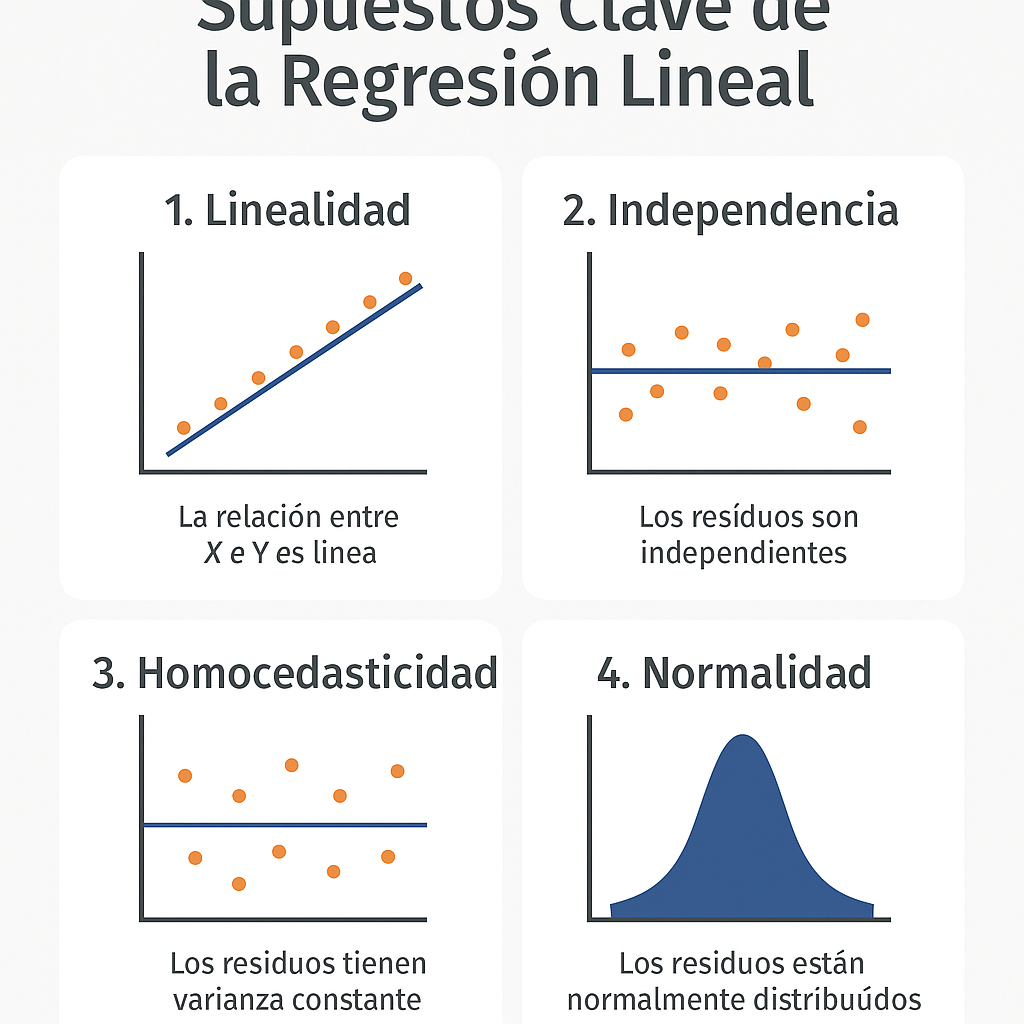

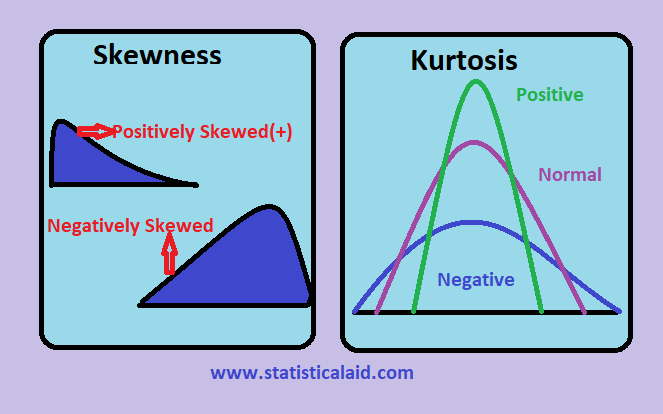

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import gradio as gr
import pandas as pd

def regression_diagnostics(slope=1.0, intercept=0.0, noise=1.0, n_points=50,
                            noise_type="Normal", violate="Ninguna"):
    np.random.seed(42)
    x = np.linspace(0, 10, n_points)

    # Generación de ruido base
    if noise_type == "Normal":
        e = np.random.normal(0, noise, n_points)
    elif noise_type == "Skewed":
        e = np.random.exponential(scale=noise, size=n_points) - noise
    elif noise_type == "Heavy Tails":
        e = stats.t.rvs(df=2, size=n_points) * noise
    elif noise_type == "With Outliers":
        e = np.random.normal(0, noise, n_points)
        outlier_idx = np.random.choice(n_points, size=n_points // 10, replace=False)
        e[outlier_idx] += np.random.normal(10 * noise, 2 * noise, len(outlier_idx))
    else:
        e = np.random.normal(0, noise, n_points)

    # Aplicar violaciones de supuestos
    if violate == "Linealidad":
        x = np.linspace(0, 10, n_points)
        y = slope * np.sin(x) + intercept + e  # relación no lineal
    elif violate == "Independencia":
        for i in range(1, len(e)):
            e[i] += 0.8 * e[i - 1]  # autocorrelación del error
        y = slope * x + intercept + e
    elif violate == "Homocedasticidad":
        e = np.random.normal(0, noise * (1 + x / 5), n_points)  # varianza creciente
        y = slope * x + intercept + e
    else:
        y = slope * x + intercept + e

    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    residuos = model.resid
    fitted = model.fittedvalues

    # Gráfico 1: Regresión
    fig1, ax1 = plt.subplots()
    ax1.scatter(x, y, color='blue', label='Datos')
    ax1.plot(x, fitted, color='red', label='Regresión')
    ax1.set_title("Gráfico de Regresión")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.grid(True)
    ax1.legend()

    # Gráfico 2: Histograma + curva normal
    fig2, ax2 = plt.subplots()
    sns.histplot(residuos, kde=False, stat="density", bins=15, color="skyblue", ax=ax2)
    mu, std = np.mean(residuos), np.std(residuos)
    x_vals = np.linspace(residuos.min(), residuos.max(), 100)
    ax2.plot(x_vals, stats.norm.pdf(x_vals, mu, std), 'r--')
    ax2.set_title("Histograma de Residuos + Curva Normal")
    ax2.set_xlabel("Residuos")
    ax2.set_ylabel("Densidad")
    ax2.grid(True)

    # Gráfico 3: Q-Q plot
    fig3, ax3 = plt.subplots()
    stats.probplot(residuos, dist="norm", plot=ax3)
    ax3.set_title("Q-Q Plot de los Residuos")

    # Gráfico 4: Residuos vs Ajustados
    fig4, ax4 = plt.subplots()
    ax4.scatter(fitted, residuos, color='purple')
    ax4.axhline(0, linestyle='--', color='gray')
    ax4.set_xlabel("Valores ajustados (ŷ)")
    ax4.set_ylabel("Residuos")
    ax4.set_title("Residuos vs Valores Ajustados")
    ax4.grid(True)

    # Diagnóstico estadístico
    omnibus_stat, omnibus_p = sm.stats.omni_normtest(residuos)
    jb_stat, jb_p = stats.jarque_bera(residuos)
    summary_dict = {
        "Omnibus": omnibus_stat,
        "Prob(Omnibus)": omnibus_p,
        "Skew": stats.skew(residuos),
        "Kurtosis": stats.kurtosis(residuos, fisher=False),
        "Jarque-Bera": jb_stat,
        "Prob(JB)": jb_p,
        "Durbin-Watson": sm.stats.stattools.durbin_watson(residuos)
    }
    df_summary = pd.DataFrame({
        "Métrica": list(summary_dict.keys()),
        "Valor": list(summary_dict.values())
    })
    df_summary["Valor"] = df_summary["Valor"].round(4)

    # Resumen textual del modelo
    resumen_textual = model.summary().as_text()

    return fig1, fig2, fig3, fig4, df_summary, resumen_textual

# Interfaz de Gradio
iface = gr.Interface(
    fn=regression_diagnostics,
    inputs=[
        gr.Slider(-5, 5, step=0.1, value=1.0, label="Pendiente"),
        gr.Slider(-10, 10, step=0.1, value=0.0, label="Intercepto"),
        gr.Slider(0.1, 5.0, step=0.1, value=1.0, label="Nivel de ruido"),
        gr.Slider(20, 200, step=10, value=50, label="Número de puntos"),
        gr.Radio(["Normal", "Skewed", "Heavy Tails", "With Outliers"], label="Tipo de ruido", value="Normal"),
        gr.Radio(["Ninguna", "Linealidad", "Independencia", "Homocedasticidad"], label="Violar supuesto")
    ],
    outputs=[
        gr.Plot(label="📉 Gráfico de Regresión"),
        gr.Plot(label="📊 Histograma de Residuos + Curva Normal"),
        gr.Plot(label="📈 Q-Q Plot de Residuos"),
        gr.Plot(label="🎯 Residuos vs Valores Ajustados"),
        gr.Dataframe(label="🧪 Diagnóstico Estadístico"),
        gr.Textbox(label="📄 Resumen del modelo (statsmodels)", lines=20)
    ],
    title="Diagnóstico Interactivo de Regresión Lineal",
    description="Explora cómo diferentes tipos de errores y violaciones de supuestos afectan el modelo de regresión lineal."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dd193f3e905b7352c2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Preguntas

1. Modifiquemos la pendiente
    1. ¿Que valores debe tener para que haya correlación positiva y cuales para una correlación negativa?
    2. ¿Qué valores para que no haya correlación?
    3. ¿Cómo afecta esto al coeficiente de determinación?
2. ¿Que pasa si modificamos el intercepto?
3. Que pasa si aumentamos el ruido
    1. Cómo se modifica la pendiente?
    2. Cómo se modifica el intercepto?
    3. Cómo se modifica AIC, BIC ?
    4. Qué pasa con los residuos ?

# 📋 Flujo completo de ML en Radiología: Diagnóstico de Neumonía
"""
🚀 Flujo de trabajo clásico en Machine Learning:

1. Recolección de datos → Dataset clínico simulado.
2. Preprocesamiento     → Codificación de variables categóricas, limpieza.
3. División del dataset  → Train/Test split.
4. Entrenamiento         → Modelos supervisados.
5. Evaluación            → Métricas: accuracy, recall, curva ROC.
"""

In [22]:
!wget https://raw.githubusercontent.com/bpizarrogalleguillos/IAmetodologia2025/main/data_2.csv

--2025-05-08 23:09:15--  https://raw.githubusercontent.com/bpizarrogalleguillos/IAmetodologia2025/main/data_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17303 (17K) [text/plain]
Saving to: ‘data_2.csv.1’

data_2.csv.1        100%[===================>]  16.90K  --.-KB/s    in 0.001s  

2025-05-08 23:09:15 (14.5 MB/s) - ‘data_2.csv.1’ saved [17303/17303]



In [23]:
pd.read_csv("data_2.csv")

,edad,sexo,fiebre,temperatura,tos,infiltrado_rx,engrosamiento_parietal,foco_condensacion,patron_intersticial,derrame_pleural,broncograma_aereo,cruza_cisuras,leucocitosis,pcr,indice_rx,diagnostico_neumonia,ingreso_uci,intubacion,mortalidad
0,58,F,1,39.0,1,0,0,1,0,1,0,0,12568,44.8,10.7536,1,1,1,1
1,48,F,1,38.4,0,1,0,0,0,0,0,0,11522,37.0,7.1544,1,0,0,0
2,39,F,1,38.6,1,0,0,1,1,0,0,0,15715,48.2,10.5530,1,1,1,1
3,21,M,1,38.3,1,0,1,0,0,0,0,0,13450,47.1,7.5450,1,1,1,0
4,30,M,0,37.1,1,0,0,1,0,0,0,0,6462,18.6,5.2224,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,47,F,1,38.8,0,1,0,1,0,0,0,0,12572,42.5,10.6394,1,1,1,0
296,35,F,1,38.4,1,0,0,0,0,0,0,0,12889,43.7,6.2628,1,1,1,1
297,86,M,0,36.6,1,1,0,0,1,0,0,0,8143,24.9,4.8736,0,0,0,0
298,56,M,1,38.1,0,1,0,0,1,0,1,0,13457,40.2,10.2014,1,0,1,0


In [24]:

data = pd.read_csv("data_2.csv")

# Análisis exploratorio

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

AttributeError: module 'seaborn' has no attribute 'palettes'

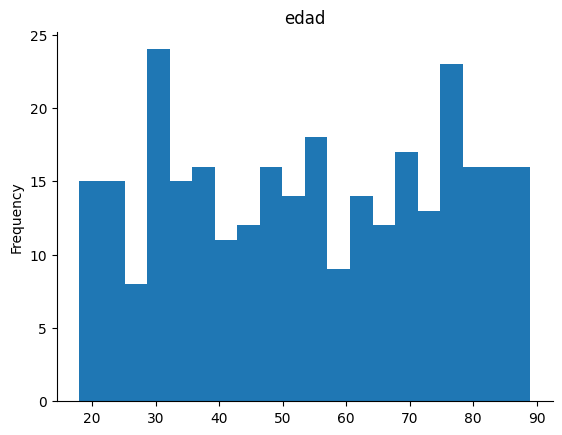

In [26]:

from matplotlib import pyplot as plt
data['edad'].plot(kind='hist', bins=20, title='edad')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

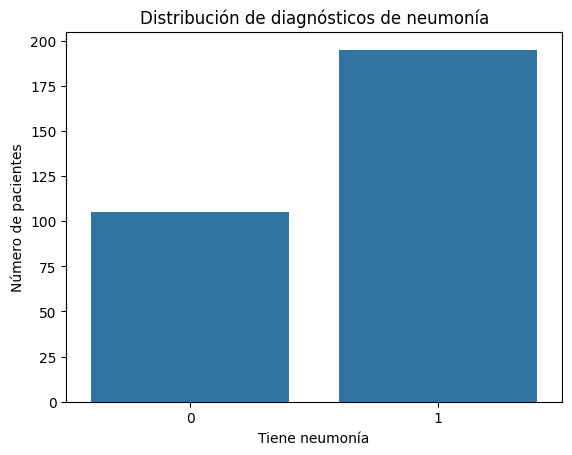

In [ ]:

sns.countplot(x='diagnostico_neumonia', data=data)
plt.title("Distribución de diagnósticos de neumonía")
plt.xlabel("Tiene neumonía")
plt.ylabel("Número de pacientes")
plt.show()

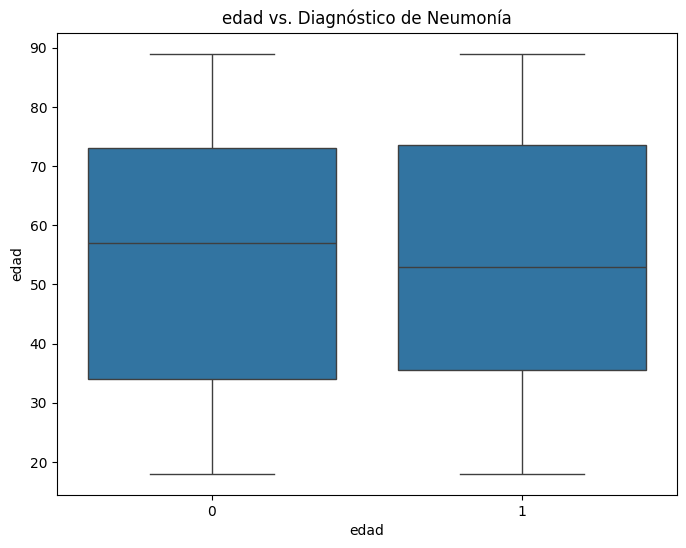

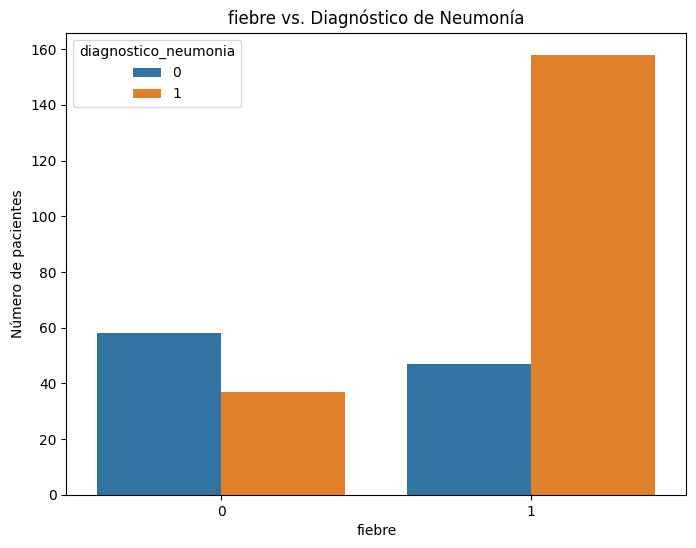

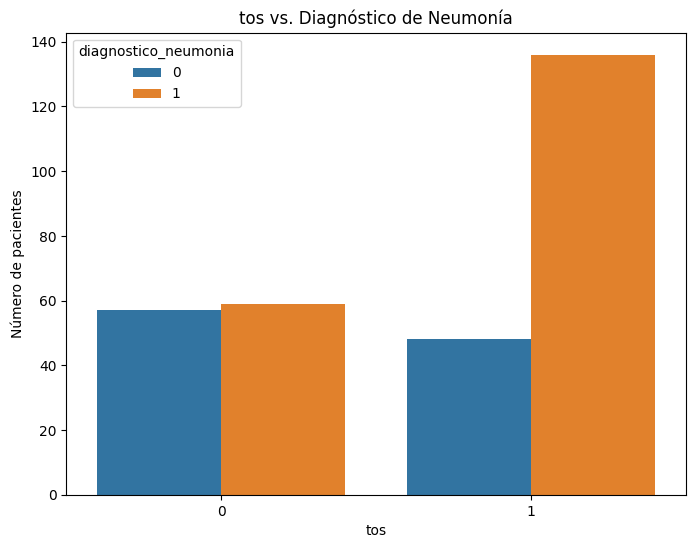

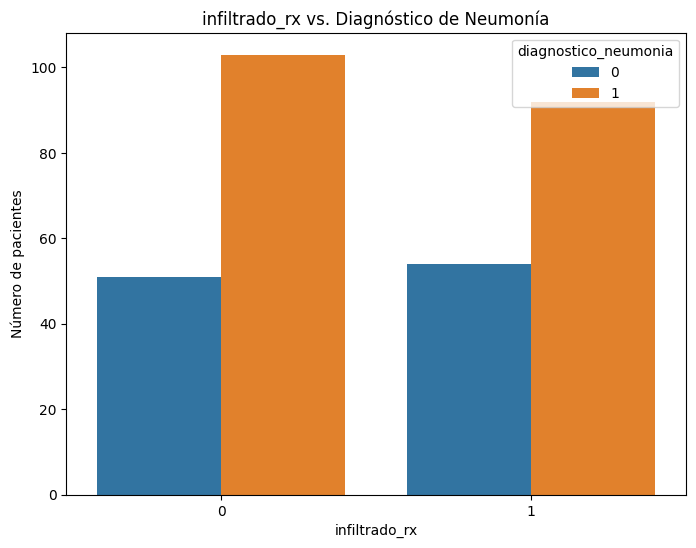

In [ ]:
# Lista de variables a comparar con el diagnóstico de neumonía
features_to_plot = ['edad', 'fiebre', 'tos', 'infiltrado_rx']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))

    if data[feature].nunique() <= 2:  # Variables binarias o categóricas simples
        sns.countplot(x=feature, hue='diagnostico_neumonia', data=data)
        plt.ylabel('Número de pacientes')
    else:  # Variables continuas (como edad)
        sns.boxplot(x='diagnostico_neumonia', y=feature, data=data)
        plt.ylabel(feature)

    plt.title(f'{feature} vs. Diagnóstico de Neumonía')
    plt.xlabel(feature)
    plt.show()

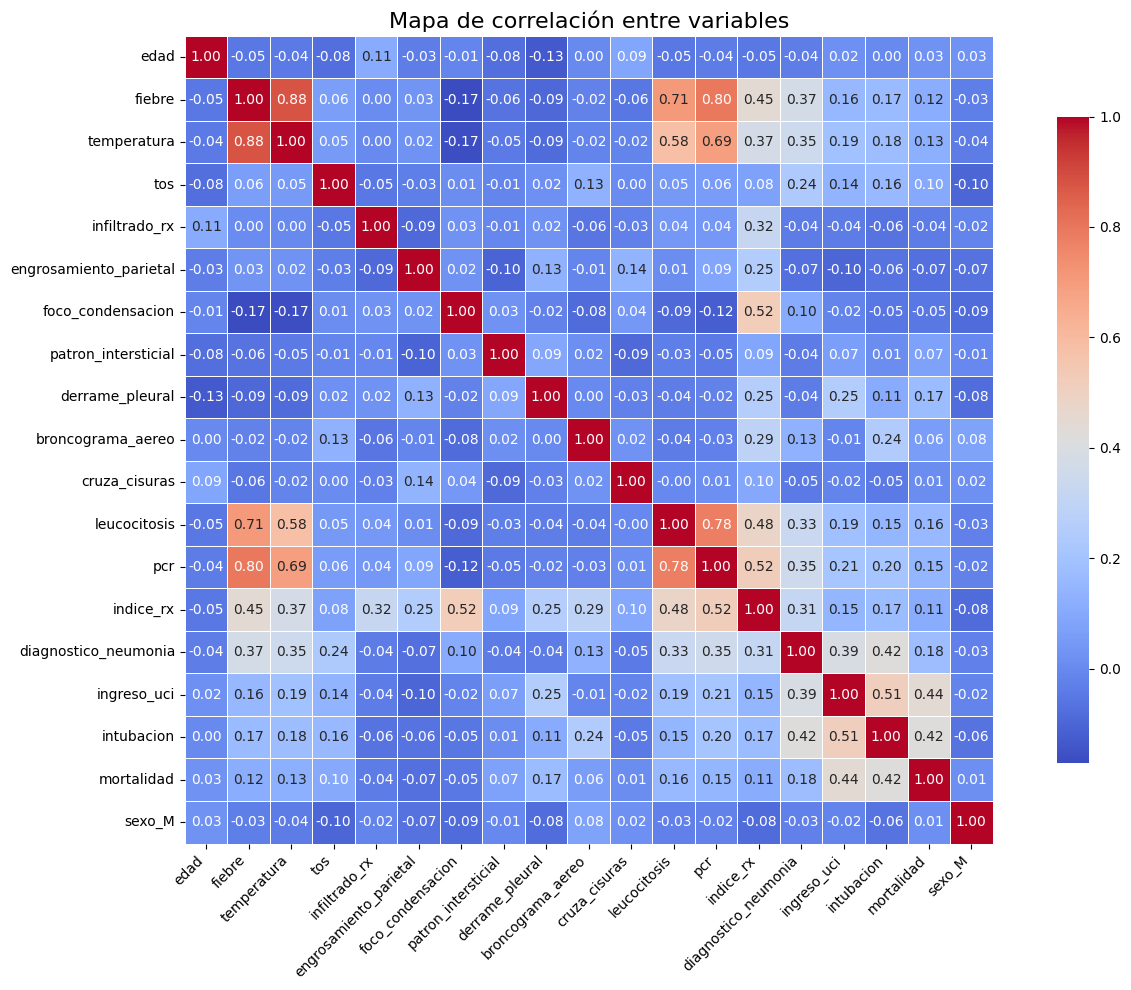

In [ ]:
#@title 📊 Mapa de correlación entre variables

# Asegurar que todas las variables categóricas estén codificadas numéricamente
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)

# Calcular matriz de correlación
correlation_matrix = encoded_data.corr()

# Graficar heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=0.5
)
plt.title("Mapa de correlación entre variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#@title 🔄 Preprocesamiento de datos

# Convertir variable categórica 'sexo' a variable numérica
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)

# Eliminar variables que no deben ser usadas como predictoras del diagnóstico
variables_a_excluir = ['ingreso_uci', 'intubacion', 'mortalidad']
X = encoded_data.drop(columns=['diagnostico_neumonia'] + variables_a_excluir)

# Variable objetivo
y = encoded_data['diagnostico_neumonia']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ejemplo de regresión linea

Ya hemos realizado un análisis exploratorio de los datos. Ahora queremos modelar y poder cuantificar la relación entre ellos. Para esto contamos con una herramienta simple pero de gran utilidad denominada regresión lineal.

En base a lo expuesto en la clase ¿Que variables podrían ser utilizadas para una regresión lineal en este set de datos?

In [ ]:
# -----------------------------------------------------------
# 1. Cargar el Dataset
# -----------------------------------------------------------
# Se asume que el archivo 'data_supervisado_1.csv' está en el entorno de Colab.
# Si el dataset está delimitado por tabulaciones, se utiliza sep='\t'
df= data

# Convertir la variable 'sexo_M' de booleana a numérica (0 o 1) para su posible inclusión en la regresión.
#if df['sexo_M'].dtype == 'bool':
#    df['sexo_M'] = df['sexo_M'].astype(int)

# Identificar las columnas numéricas disponibles para el análisis.
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas disponibles para análisis:", numeric_columns)



Columnas numéricas disponibles para análisis: ['edad', 'fiebre', 'temperatura', 'tos', 'infiltrado_rx', 'engrosamiento_parietal', 'foco_condensacion', 'patron_intersticial', 'derrame_pleural', 'broncograma_aereo', 'cruza_cisuras', 'leucocitosis', 'pcr', 'indice_rx', 'diagnostico_neumonia', 'ingreso_uci', 'intubacion', 'mortalidad']


In [ ]:
# -----------------------------------------------------------
# 2. Definir la Función Interactiva para la Regresión
# -----------------------------------------------------------
def regression_interactive(x_column, y_column):
    """
    Esta función:
      - Extrae la variable independiente (x) y la variable dependiente (y) según la selección.
      - Ajusta un modelo de regresión lineal usando scikit-learn.
      - Calcula el coeficiente de determinación (R²).
      - Obtiene un resumen estadístico completo del modelo con statsmodels.
      - Grafica los datos observados junto a la línea de regresión.
      - Evalúa visualmente los supuestos de regresión lineal.
      - Proporciona una interpretación de los resultados.
    """
    # Extraer los datos de las columnas seleccionadas
    X = df[[x_column]].values
    y = df[y_column].values

    # Ajustar el modelo de regresión lineal (scikit-learn)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Ajuste con statsmodels para obtener un resumen detallado
    X_sm = sm.add_constant(X)  # Agrega constante (intercepto)
    model_sm = sm.OLS(y, X_sm).fit()
    residuos = model_sm.resid
    fitted = model_sm.fittedvalues

    # Graficar los datos y la línea ajustada
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Datos observados')
    plt.plot(X, y_pred, color='red', label='Línea de regresión')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Regresión Lineal: {y_column} vs. {x_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfico de residuos vs valores ajustados
    plt.figure(figsize=(6, 4))
    plt.scatter(fitted, residuos, color='purple')
    plt.axhline(0, linestyle='--', color='gray')
    plt.title("Residuos vs Valores Ajustados")
    plt.xlabel("Valores ajustados (ŷ)")
    plt.ylabel("Residuos")
    plt.grid(True)
    plt.show()

    # Histograma de residuos con curva normal
    plt.figure(figsize=(6, 4))
    sns.histplot(residuos, kde=False, stat="density", bins=15, color="skyblue")
    mu, std = np.mean(residuos), np.std(residuos)
    x_vals = np.linspace(residuos.min(), residuos.max(), 100)
    plt.plot(x_vals, stats.norm.pdf(x_vals, mu, std), 'r--')
    plt.title("Histograma de Residuos + Curva Normal")
    plt.xlabel("Residuos")
    plt.ylabel("Densidad")
    plt.grid(True)
    plt.show()

    # Q-Q plot
    fig = sm.qqplot(residuos, line='45', fit=True)
    plt.title("Q-Q Plot de los Residuos")
    plt.grid(True)
    plt.show()

    # Mostrar parámetros obtenidos con scikit-learn
    print("Parámetros del modelo (scikit-learn):")
    print(f"   Pendiente (coeficiente): {model.coef_[0]:.3f}")
    print(f"   Intercepto: {model.intercept_:.3f}")
    print(f"   Coeficiente de determinación (R²): {r2:.3f}\n")

    # Mostrar resumen detallado del modelo con statsmodels
    print("Resumen detallado del modelo (statsmodels):")
    print(model_sm.summary())

    # Interpretación de los resultados:
    print("\nInterpretación de los resultados:")
    print(f"   - La pendiente de {model.coef_[0]:.3f} indica el cambio esperado en '{y_column}' por cada unidad adicional en '{x_column}'.")
    print("     Por ejemplo, si '{x_column}' representa la 'edad', una pendiente de 0.5 implicaría que por cada año adicional se espera un aumento de 0.5 unidades en '{y_column}'.")
    print("   - El intercepto es el valor de '{y_column}' cuando '{x_column}' es 0, lo cual en algunos contextos puede o no tener interpretación clínica directa.")
    print("   - El coeficiente de determinación (R²) indica la proporción de la variabilidad observada en los datos que es explicada por el modelo.")
    if r2 >= 0.7:
        print("     Un R² alto (cercano a 1) sugiere un buen ajuste del modelo.")
    elif r2 >= 0.4:
        print("     Un R² moderado indica que el modelo explica parte de la variabilidad, pero hay otros factores involucrados.")
    else:
        print("     Un R² bajo (cercano a 0) sugiere que el modelo tiene limitaciones para explicar la variabilidad de los datos.")
    print("   - Revisa los valores de p-value en el resumen de statsmodels para entender la significancia estadística de los coeficientes.")

# -----------------------------------------------------------
# 3. Crear la Interfaz Interactiva
# -----------------------------------------------------------
interact(regression_interactive,
         x_column=widgets.Dropdown(options=numeric_columns, value=numeric_columns[0],
                                   description='Variable independiente:'),
         y_column=widgets.Dropdown(options=numeric_columns,
                                   value=numeric_columns[1] if len(numeric_columns) > 1 else numeric_columns[0],
                                   description='Variable dependiente:'))

interactive(children=(Dropdown(description='Variable independiente:', options=('edad', 'fiebre', 'temperatura'…

<function __main__.regression_interactive(x_column, y_column)>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import gradio as gr

# Simulamos un DataFrame de ejemplo
df = data

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

def regression_interactive_gradio(x_column, y_column, valor_a_predecir):
    X = df[[x_column]].values
    y = df[y_column].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(y, X_sm).fit()
    residuos = model_sm.resid
    fitted = model_sm.fittedvalues

    # Gráfico 1: Regresión
    fig1, ax1 = plt.subplots()
    ax1.scatter(X, y, color='blue', label='Datos observados')
    ax1.plot(X, y_pred, color='red', label='Línea de regresión')
    ax1.set_title(f'Regresión Lineal: {y_column} vs. {x_column}')
    ax1.set_xlabel(x_column)
    ax1.set_ylabel(y_column)
    ax1.grid(True)
    ax1.legend()

    # Gráfico 2: Residuos vs Ajustados
    fig2, ax2 = plt.subplots()
    ax2.scatter(fitted, residuos, color='purple')
    ax2.axhline(0, linestyle='--', color='gray')
    ax2.set_title("Residuos vs Valores Ajustados")
    ax2.set_xlabel("Valores ajustados (ŷ)")
    ax2.set_ylabel("Residuos")
    ax2.grid(True)

    # Gráfico 3: Histograma de residuos
    fig3, ax3 = plt.subplots()
    sns.histplot(residuos, kde=False, stat="density", bins=15, color="skyblue", ax=ax3)
    mu, std = np.mean(residuos), np.std(residuos)
    x_vals = np.linspace(residuos.min(), residuos.max(), 100)
    ax3.plot(x_vals, stats.norm.pdf(x_vals, mu, std), 'r--')
    ax3.set_title("Histograma de Residuos + Curva Normal")
    ax3.set_xlabel("Residuos")
    ax3.set_ylabel("Densidad")
    ax3.grid(True)

    # Gráfico 4: Q-Q plot
    fig4, ax4 = plt.subplots()
    sm.qqplot(residuos, line='45', fit=True, ax=ax4)
    ax4.set_title("Q-Q Plot de los Residuos")

    # Diagnóstico automático
    omnibus_stat, omnibus_p = sm.stats.omni_normtest(residuos)
    jb_stat, jb_p = stats.jarque_bera(residuos)
    dw_stat = sm.stats.stattools.durbin_watson(residuos)

    resumen = f"📊 Resultados del Modelo\n"
    resumen += f"Pendiente: {model.coef_[0]:.4f}\n"
    resumen += f"Intercepto: {model.intercept_:.4f}\n"
    resumen += f"R²: {r2:.3f}\n\n"
    resumen += "📋 Diagnóstico de Supuestos:\n"

    # Interpretaciones automáticas
    if r2 < 0.4:
        resumen += "❗ R² bajo → el modelo explica poca variabilidad.\n"
    elif r2 < 0.7:
        resumen += "⚠️ R² moderado → explicación parcial.\n"
    else:
        resumen += "✅ R² alto → buen ajuste.\n"

    if omnibus_p < 0.05 or jb_p < 0.05:
        resumen += "❗ Los residuos no siguen una distribución normal.\n"
    else:
        resumen += "✅ Los residuos parecen normalmente distribuidos.\n"

    if dw_stat < 1.5 or dw_stat > 2.5:
        resumen += f"❗ Posible autocorrelación en residuos (Durbin-Watson = {dw_stat:.2f})\n"
    else:
        resumen += f"✅ Sin evidencia de autocorrelación (Durbin-Watson = {dw_stat:.2f})\n"

    # Predicción
    try:
        valor_float = float(valor_a_predecir)
        predicho = model.predict(np.array([[valor_float]]))[0]
        resumen += f"\n🔮 Predicción para {x_column} = {valor_float}:\n→ {y_column} estimado: {predicho:.2f}"
    except:
        resumen += "\n⚠️ Ingrese un valor numérico válido para predecir."

    # Diagnóstico estadístico como tabla
    summary_dict = {
        "Omnibus": round(omnibus_stat, 4),
        "Prob(Omnibus)": round(omnibus_p, 4),
        "Skew": round(stats.skew(residuos), 4),
        "Kurtosis": round(stats.kurtosis(residuos, fisher=False), 4),
        "Jarque-Bera": round(jb_stat, 4),
        "Prob(JB)": round(jb_p, 4),
        "Durbin-Watson": round(dw_stat, 4)
    }
    df_summary = pd.DataFrame({
        "Métrica": list(summary_dict.keys()),
        "Valor": list(summary_dict.values())
    })

    # Resumen completo de statsmodels
    sm_text = model_sm.summary().as_text()

    return fig1, fig2, fig3, fig4, resumen, df_summary, sm_text

iface = gr.Interface(
    fn=regression_interactive_gradio,
    inputs=[
        gr.Dropdown(choices=numeric_columns, label="Variable independiente"),
        gr.Dropdown(choices=numeric_columns, label="Variable dependiente"),
        gr.Textbox(label="Valor de la variable independiente para predecir")
    ],
    outputs=[
        gr.Plot(label="📉 Gráfico de Regresión"),
        gr.Plot(label="🎯 Residuos vs Ajustados"),
        gr.Plot(label="📊 Histograma de Residuos"),
        gr.Plot(label="📈 Q-Q Plot"),
        gr.Textbox(label="📄 Interpretación automática", lines=20),
        gr.Dataframe(label="🧪 Diagnóstico Estadístico"),
        gr.Textbox(label="📄 Resumen statsmodels", lines=25)
    ],
    title="Regresión Lineal Interactiva + Diagnóstico y Predicción",
    description="Selecciona dos variables numéricas y evalúa los supuestos del modelo de regresión lineal. Luego, usa el modelo para hacer predicciones."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b3a0a4f8c9d1874ff6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
